In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
stud_math = pd.read_csv('stud_math.csv')

In [3]:
stud_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [7]:
stud_math.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [8]:
# Посмотрим отдельно на строковые и числовые данные

In [5]:
df_digit = stud_math[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel','freetime', 'goout', 'health', 'absences', 'score']]

In [6]:
df_object = stud_math[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]

In [9]:
df_digit.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [10]:
# В столбце Fedu макс значение = 40, а в колонке famrel минимальное значение = -1
# Убедимся что эти значения являются выбросами:

In [11]:
stud_math.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

In [12]:
stud_math.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [13]:
# Значение 40 в Fedu можно заменить на 4, а -1 на 1

In [14]:
stud_math.Fedu.idxmax()

11

In [15]:
stud_math.famrel.idxmin()

25

In [17]:
stud_math.loc[11, 'Fedu']=4

In [18]:
stud_math.loc[25, 'famrel']=1

In [23]:
# Для удобства отображения на графике разбиваем score на квартили
stud_math['score_1'] = pd.qcut(stud_math['score'] , [0, 0.25, 0.50, 0.75, 1])

In [20]:
# Создаем функцию countplot, подставляя нужные столбцы в параметре hue 
def get_countplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    sns.countplot(x='score_1',  
                  data=stud_math,
                  hue=column,
                  ax=ax)
          
    ax.set_title('Countplot for ' + column)
    plt.show()

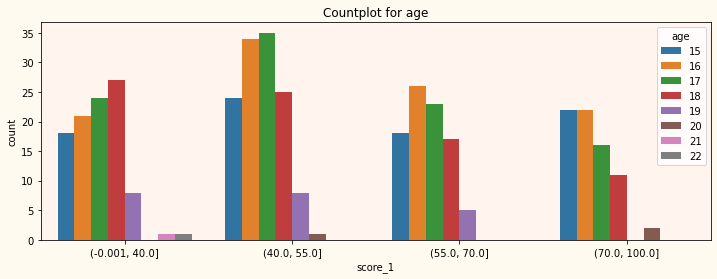

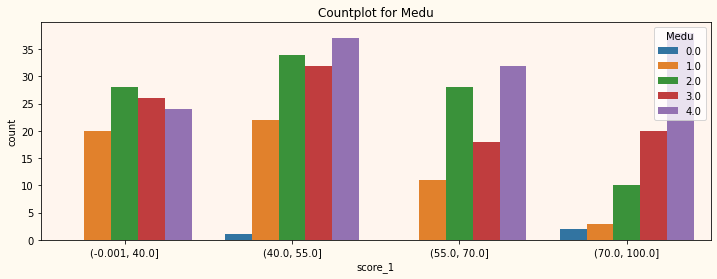

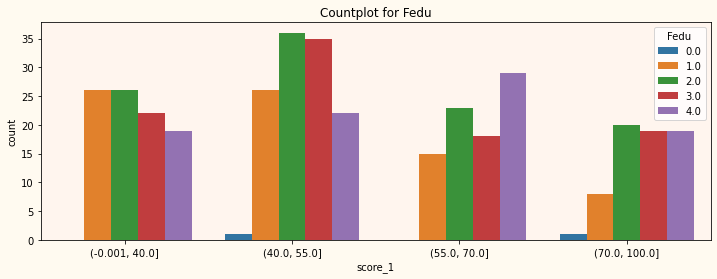

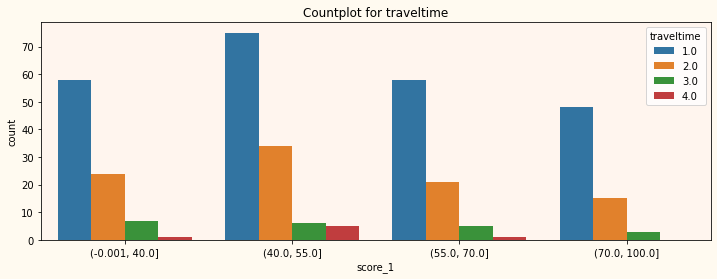

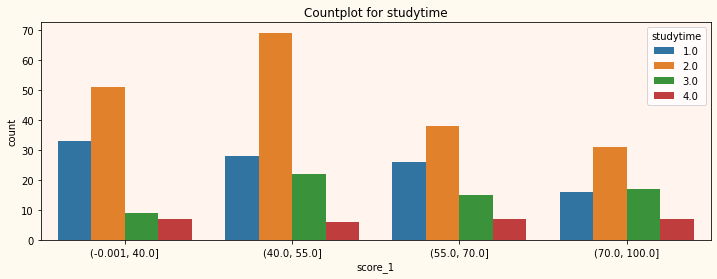

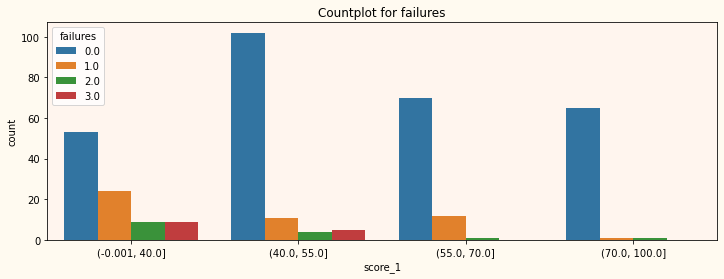

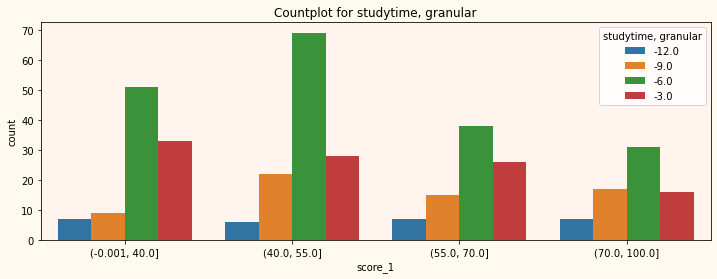

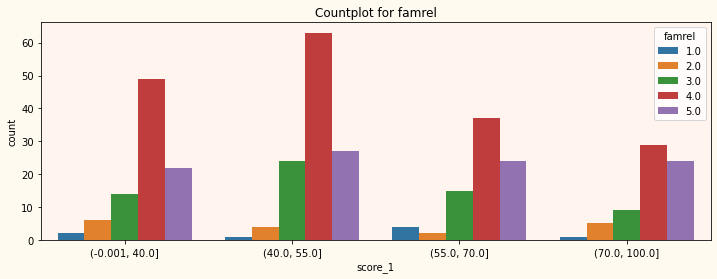

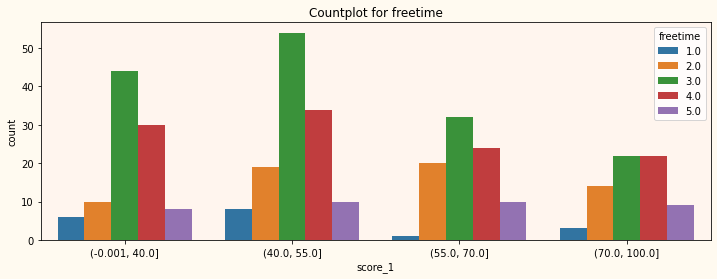

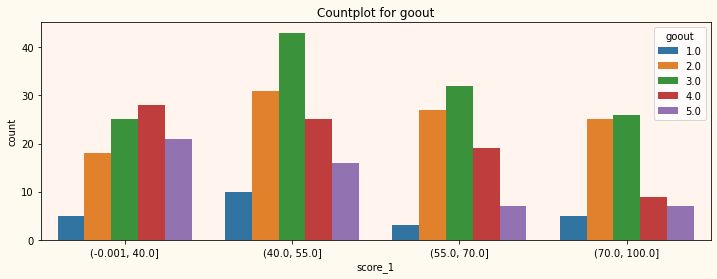

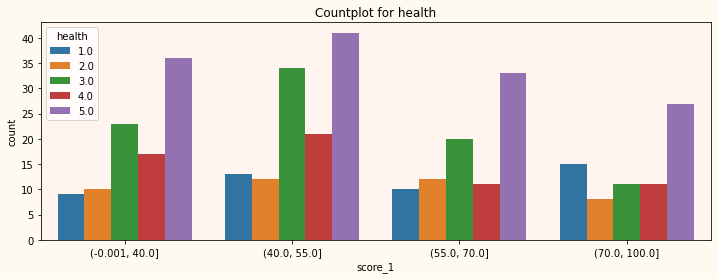

In [22]:
for col in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel','freetime', 'goout', 'health']:
    get_countplot(col)

In [24]:
## Промежуточные выводы
#  Высшее образование родителей заметно положительно влияеет на шанс получить высокую оценку
#  Долгая дорога в школу не способствует получению высокой оценки
#  Среди студентов получивших высокую оценку большинство имеют очень хорошее здоровье
#  Чем старше студент, тем хуже он сдает экзамен  

In [25]:
# Теперь посмотрим на строковые переменные

In [26]:
df_object.describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [ ]:
# Из 17 столбцов 13 имеют лишь 2 уникальных значения

In [28]:
def get_boxenplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    sns.boxenplot(x=column, y='score', 
                data=stud_math,
               ax=ax)
          
    ax.set_title('Boxenplot for ' + column)
    plt.show()

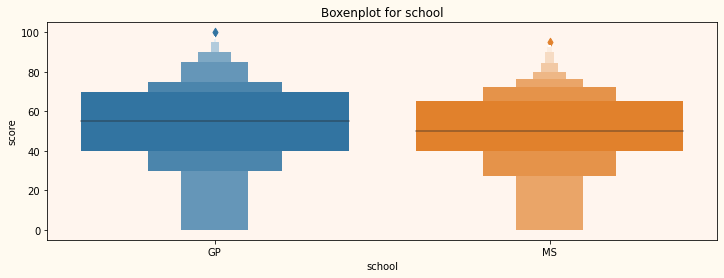

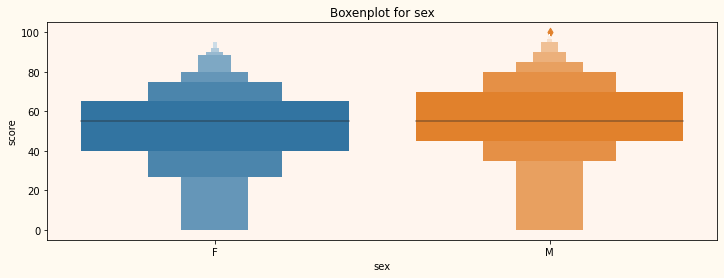

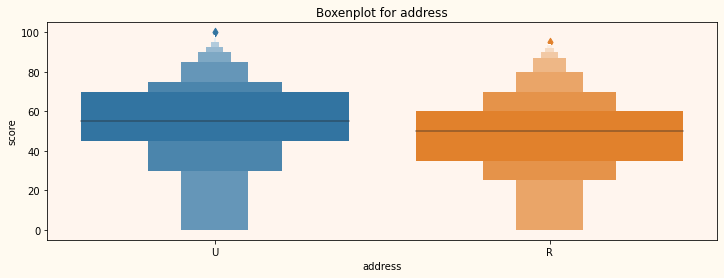

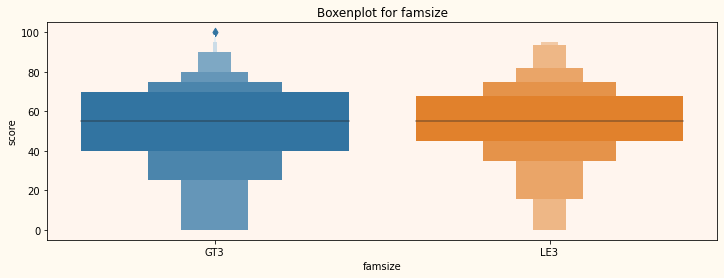

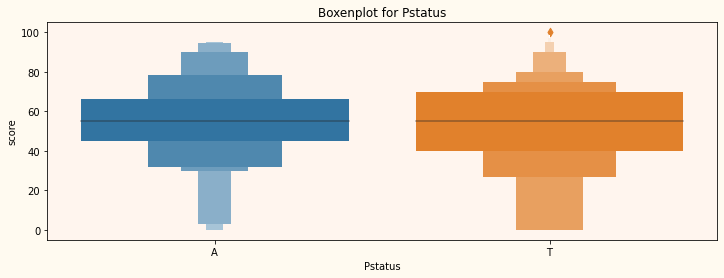

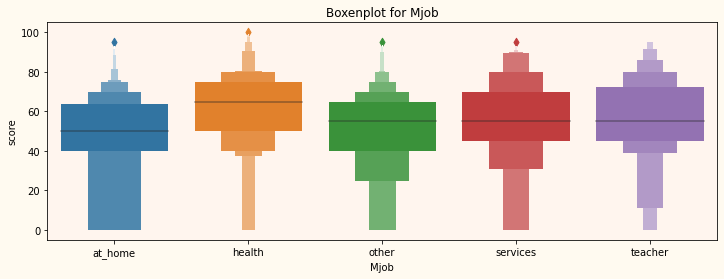

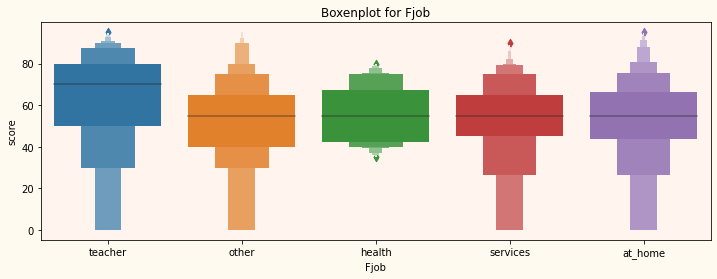

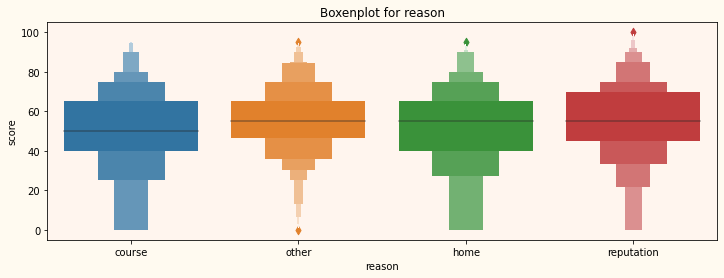

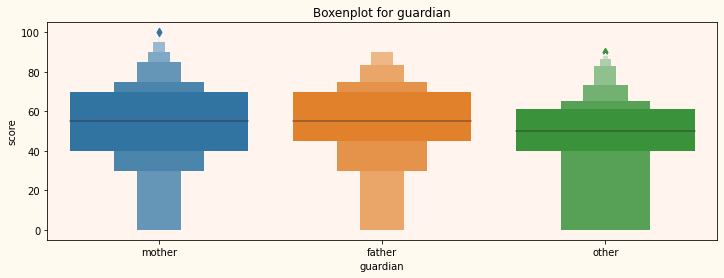

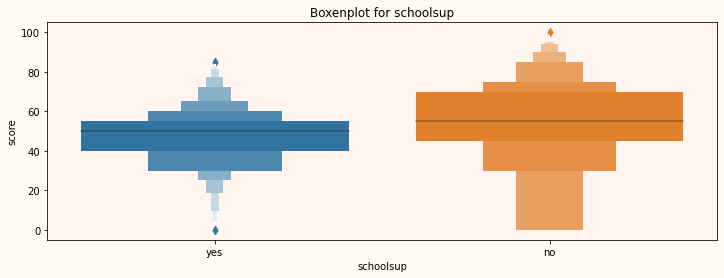

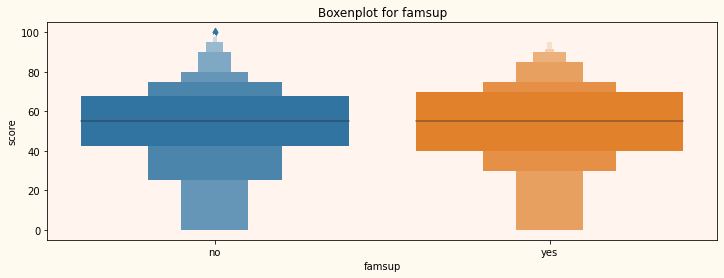

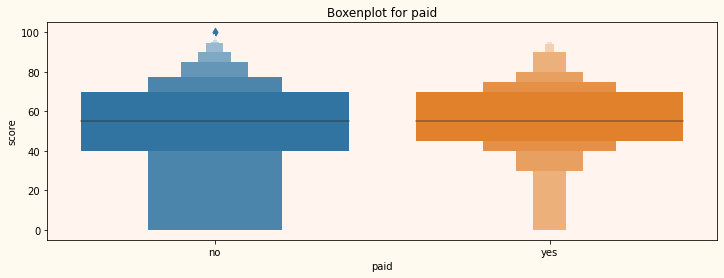

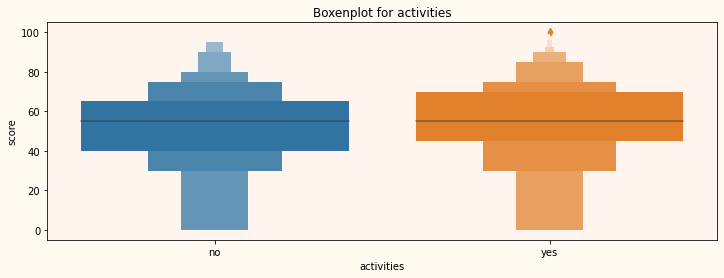

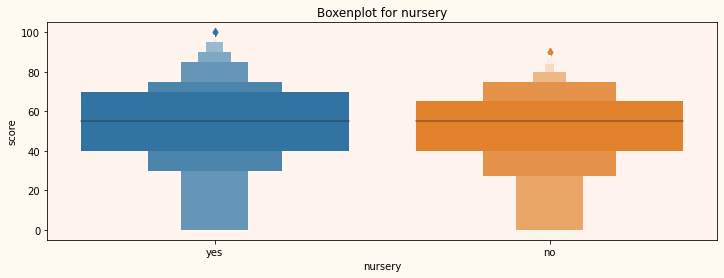

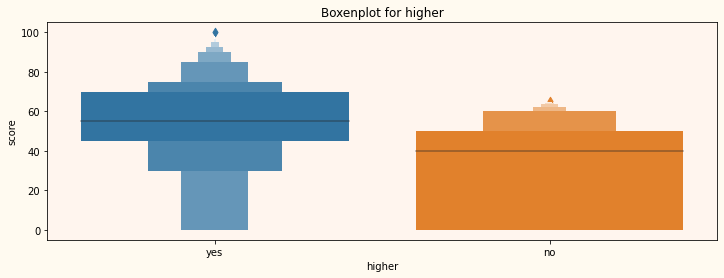

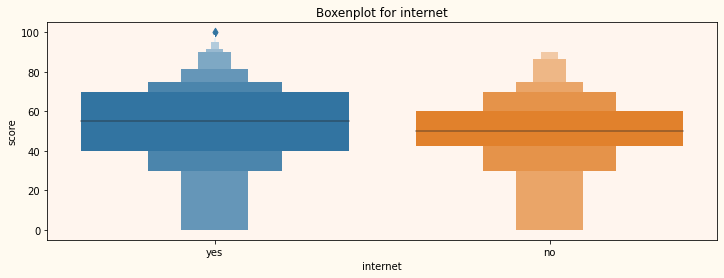

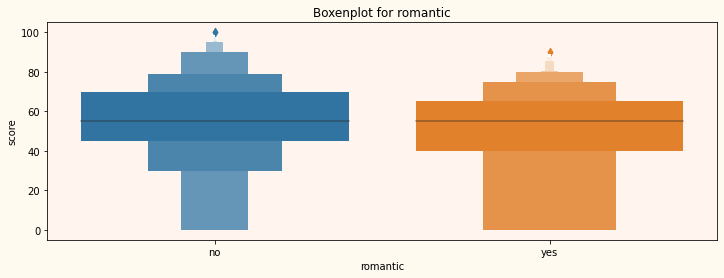

In [29]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxenplot(col)

In [30]:
##  Промежуточные выводы
#   Ярко выражена разница в успеваемости между теми кто хочет получить высшее образование и нет
#   Доп образовательная поддержка не дает ожидаемой прибавки к успеваемости (школьная особенно)
#   Дети учителей более успешно сдают экзамен
#   Среди студентов в романтических отношениях больше шанс получить низкую оценку

In [31]:
#  Корреляционный анализ

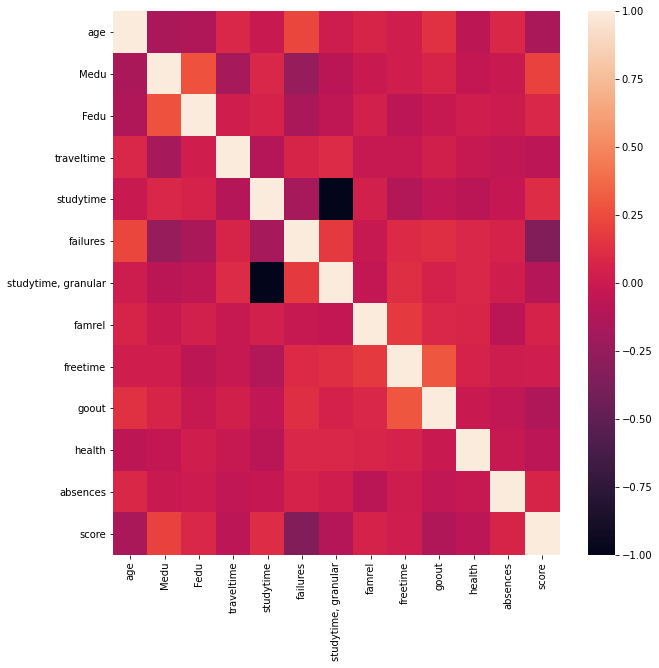

In [33]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_digit.corr());

In [34]:
# studytime и studytime, granular скоррелированы полностью (отрицательно) и поэтому можно удалить один из них
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)